<img src="mmu_logo.png" style="height: 120px;" align=left>  

# Lab 7: Learning Objectives

Towards the end of this lesson, you should be able to:
- plotting in Python
- use the Seaborn package 




In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

# At the time of creating this material, there was a versioning issue 
# between seaborn and numpy that results in a FutureWarning. This does 
# not affect the results and will presumably be fixed in some update cycle 
# but creates an annoying warning message we don't want to see every time.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seaborn
The base library for visualization in Python is `matplotlib`.  
`matplotlib` is designed to visualize *anything*, not just data. Because we're most interested in examining and presenting relationships between data, however, we will use a different library, `seaborn`. This library is specifically designed for statistical data visualization and provides a consistent and easy-to-use API.

## Relationships Between Continuous Variables
Visualizing the relationship between continuous variables is as simple as plotting the values of both variables for each data entry on the x- and y-axes of a plot.

### Scatter plots

In [3]:
tips = pd.read_csv("tips.csv")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Study the relationship between total bill and tip

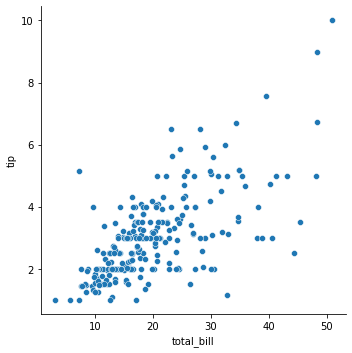

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips)

We may, of course, be interested in more than just the x- and y- values. We can use additional arguments to `relplot(...)` to distinguish data points

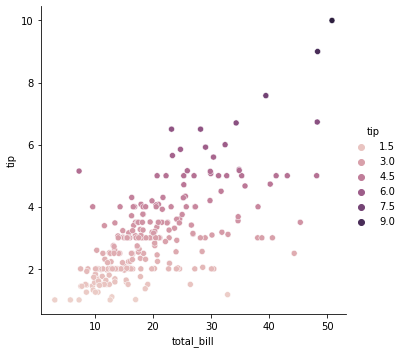

In [4]:
sns.relplot(x="total_bill", y="tip", hue="tip", data=tips)

Points are now colored differently depending on whether the entry in the dataset corresponds to a smoker or not. We can do the same for the size and style aesthetics as well.

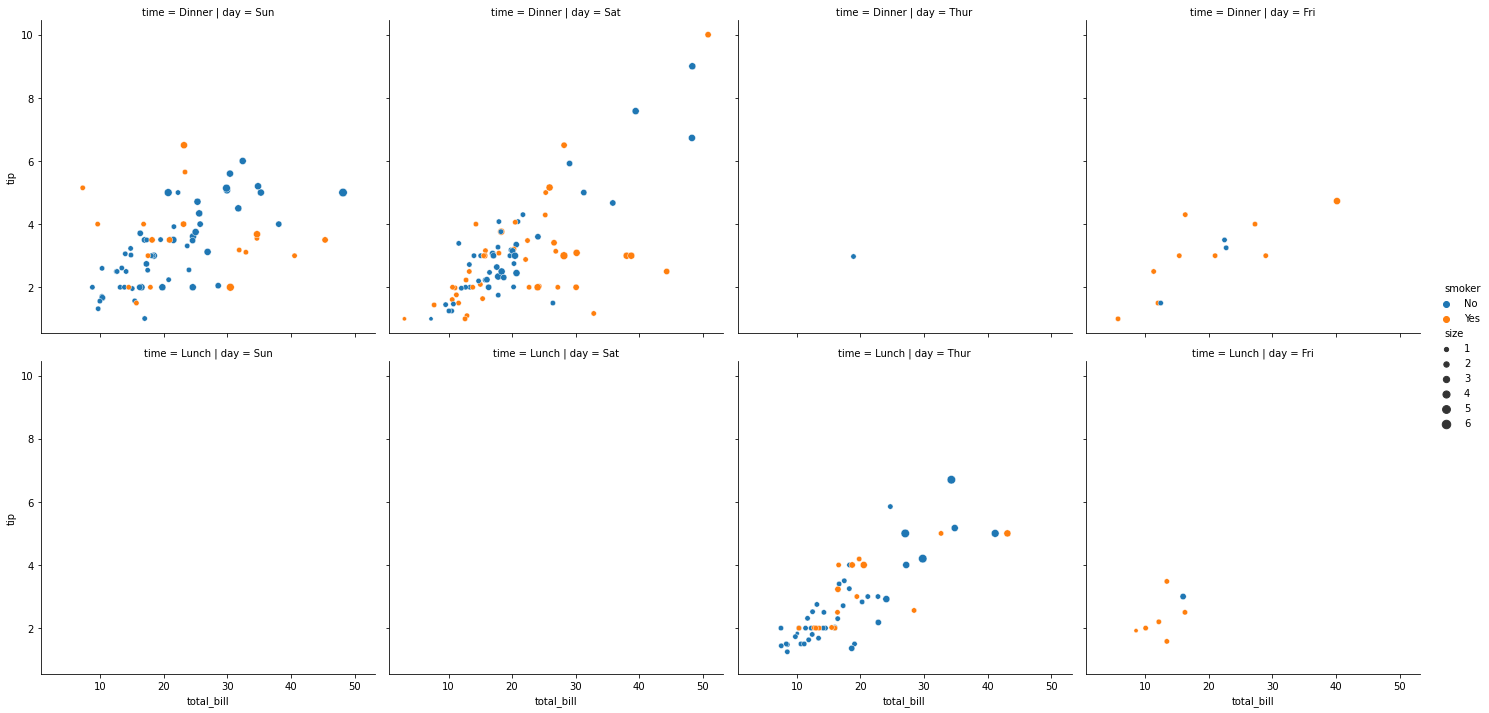

In [7]:
sns.relplot(x="total_bill", y="tip", size="size", hue='smoker', col='day',row='time', data=tips)

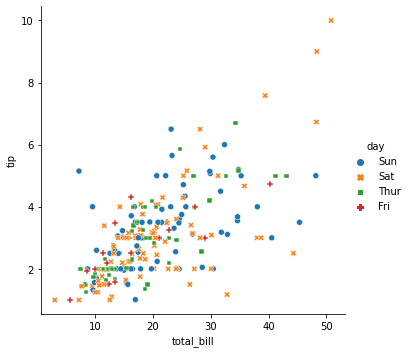

In [6]:
sns.relplot(x="total_bill", y="tip", style="day", hue='day', data=tips)

The aesthetic mappings can be combined as desired to visualize up to 5 dimensions in our datasets via the `x`, `y`, `hue`, `shape`, and `size` arguments.

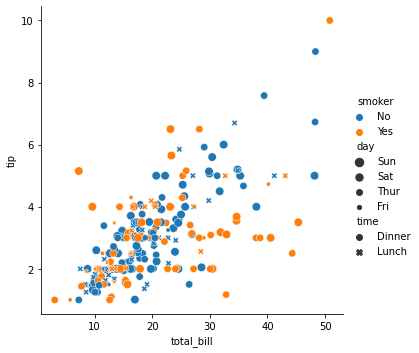

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="day", style="time", data=tips)

Be warned that this will make plots extremely difficult to visualize parse.

The `hue` and `size` aesthetics have been categorical so far, meaning that distinct colors and sizes were chosen for each possible, discrete value of the dataframe columns they were applied to. They can also be applied to continuous, numerical variables. In this case, the color palette will automatically be set to a gradient. We will see further on how to customize colors.

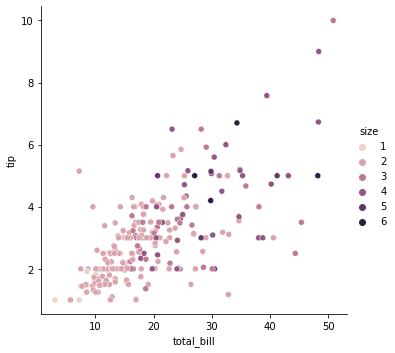

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

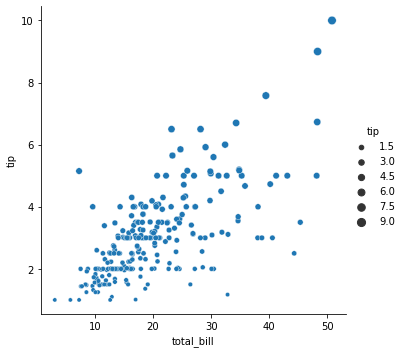

In [11]:
# by default kind='scatter'

sns.relplot(x="total_bill", y="tip", size="tip", data=tips, kind="scatter") 

### Line plots
By default, `seaborn` will create a scatterplot. In the case of time series, we may be interested in creating a line plot to better visualize trends. We can do this by simply adding a `kind="line"` argument (by default, this argument is `kind="scatter"`).

In [12]:
# A bit information about numpy cumsum - cummulative sum
import numpy as np 
  
in_arr = np.array([1,2,3,4,5]) 
    
out_sum = np.cumsum(in_arr)
out_sum

array([ 1,  3,  6, 10, 15], dtype=int32)

In [13]:
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum()})

In [15]:
df

time      value
0       0  -0.202593
1       1  -0.556026
2       2   0.208131
3       3   0.442686
4       4   1.422962
..    ...        ...
495   495  27.545562
496   496  26.925487
497   497  27.482613
498   498  29.447370
499   499  28.218642

[500 rows x 2 columns]

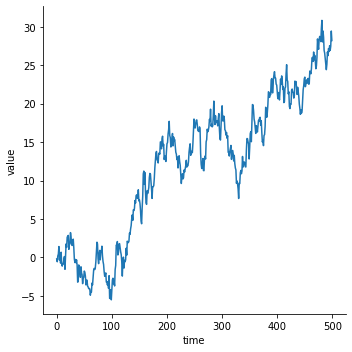

In [17]:
sns.relplot(x="time", y="value", kind="line", data=df)

By default, the dataframe will be sorted so that the x-values are in ascending order. This ensures that the line plot looks like a timeseries plot. This can, however, be disabled by setting `sort=False`. This could be useful, for example, if we are following the movement of an object or tracking how two variables change simultaneously through time.

In [23]:
import pandas as pd
df = pd.DataFrame(np.random.randn(50, 2).cumsum(axis=0), columns=["x", "y"])
df.head(10)

x         y
0  1.186475 -0.413128
1  0.486655  0.880209
2  1.304424  1.254420
3  0.771314  2.198561
4 -0.729845  1.550237
5 -0.721329  2.354707
6 -1.474627  1.735321
7 -1.558716  1.799661
8 -2.161816  1.059281
9 -3.525930  1.065537

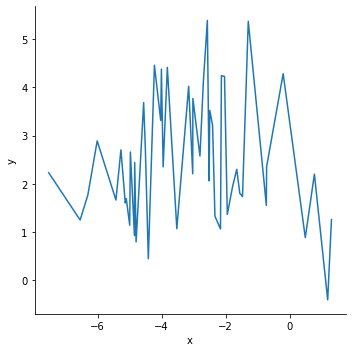

In [27]:
# if sort=False on x-axis

sns.relplot(x="x", y="y", sort=True, kind="line", data=df)

Line plots have the same aesthetic mapping possibilities as scatter plots, `hue`, `size`, and `shape`, and they can also be combined in the same way. Notice how multiple lines are created and only points with the identical mapped aesthetics are connected. That means, if we create a line plot that maps a variable to `hue` and to `style`, we will end up with an individual line for each existing combination of variables in our data.

#### Aggregating Data
Often, we may have data with multiple measurements for the same data point, i.e. x-value. For example, we might have several temperature sensors in a device as a failsafe. `seaborn` can automatically aggregate y-values for identical x-values. By default, it plots the **mean** and the 95% confidence interval around this mean in either direction.

In [28]:
fmri = pd.read_csv("fmri.csv")
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [30]:
fmri.loc[(fmri["timepoint"] == 17)].head()

subject  timepoint event    region    signal
15     s13         17  stim  parietal -0.008265
16     s12         17  stim  parietal -0.088512
18     s10         17  stim  parietal -0.016847
19      s9         17  stim  parietal -0.121574
20      s8         17  stim  parietal -0.076287

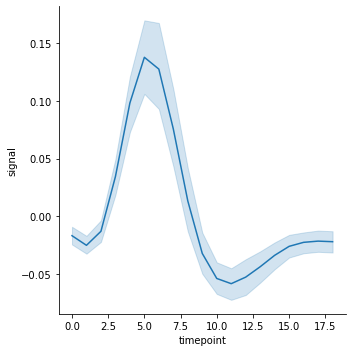

In [33]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

Because `seaborn` uses bootstrapping to compute the confidence intervals and this is a time-consuming process, it may be better to either switch to the standard deviation (`ci="sd"`) or turn this off entirely and only plot the mean (`ci=None`)

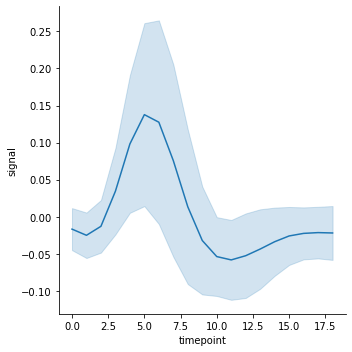

In [34]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

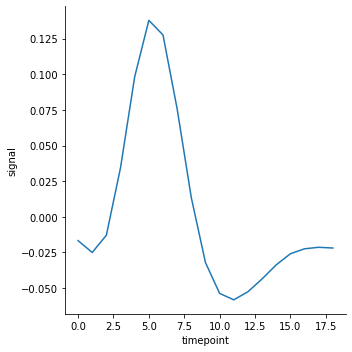

In [35]:
# by default estimator=np.mean

sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri)

We can also change our `estimator` to any aggregation function, such as `np.median(...)`, `np.sum(...)`, or even `np.max(...)`. If we want to turn off aggregation then we just set `estimator=None`. Note that this will plot all measurements and cause the data to be plotted in strange ways.

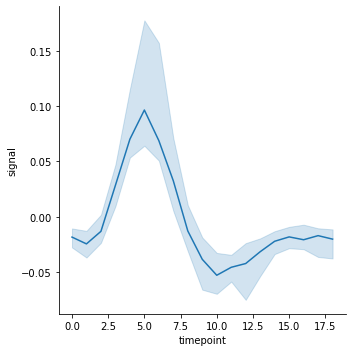

In [36]:
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=np.median, data=fmri)

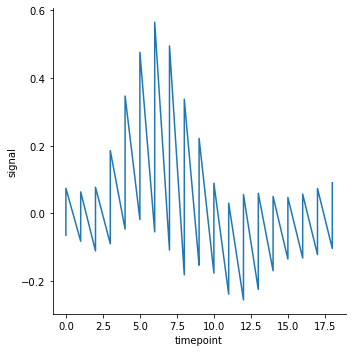

In [40]:
sns.relplot(x="timepoint", y="signal", kind="line", 
            estimator=None, data=fmri)

#### Plotting Dates
Because they're so ubiquitous, `seaborn` natively supports the date format and will automatically format plots accordingly.

In [38]:
pd.date_range("2017-1-1", periods=5)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range("1-1-2017", "22-3-2017")

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [39]:
df = pd.DataFrame({
    "time": pd.date_range("2017-1-1", periods=500),
    "value": np.random.randn(500).cumsum()})
df.head()

time     value
0 2017-01-01  0.662900
1 2017-01-02  1.530878
2 2017-01-03  2.010692
3 2017-01-04  0.819693
4 2017-01-05  1.035606

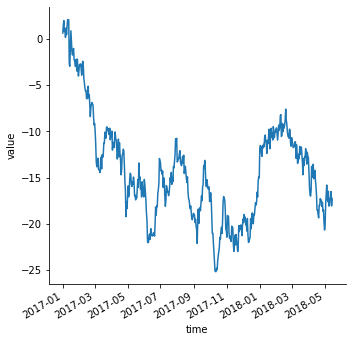

In [42]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() # automatic formatting the dates

### Showing multiple relationships with facets
We've emphasized in this tutorial that, while there functions can show several semantic variables at once, it's not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because `relplot()` is based on the `FacetGrid`, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to "facet" the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

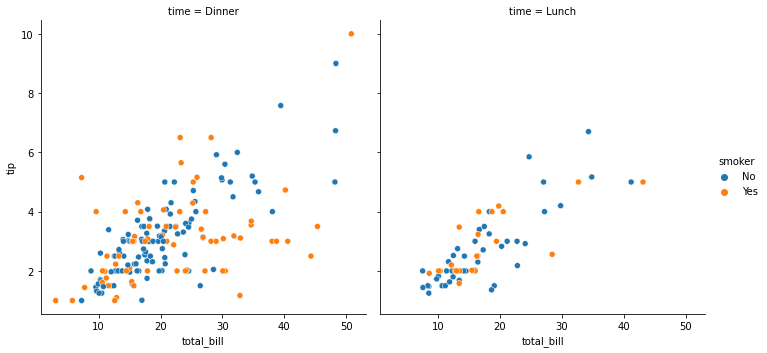

In [45]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size `FacetGrid` is parameterized by the height and aspect ratio of each facet.

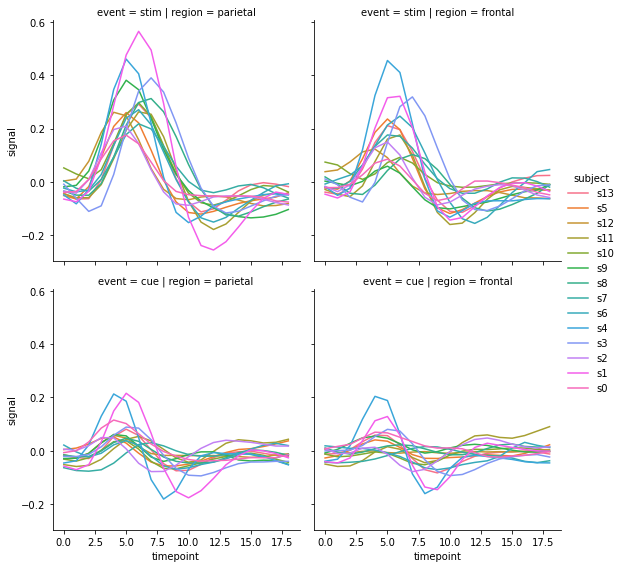

In [48]:
sns.relplot(x="timepoint", y="signal", hue="subject", col="region",
           row="event", height=4, kind="line", estimator=None, data=fmri)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then "wrap" the facets into the rows:

In [49]:
fmri_temp = fmri.copy()
fmri_temp = fmri_temp[fmri_temp["region"] == "frontal"]

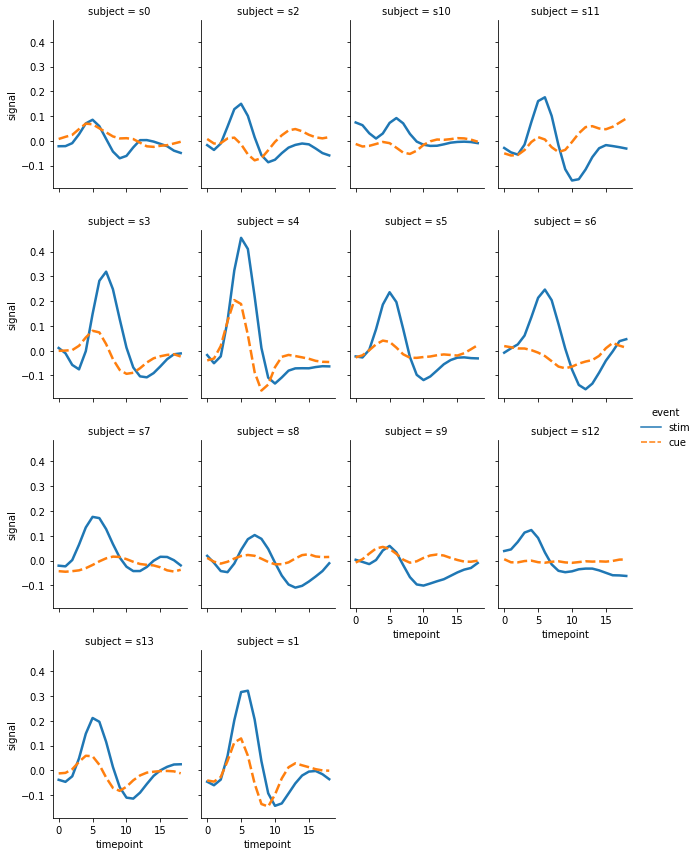

In [51]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
           col="subject", col_wrap=4, height=3, aspect=.75, linewidth=2.5,
           kind="line", data=fmri_temp)

These visualizations, which are often called "lattice" plots or "small-multiples", are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by `scatterplot()` and `relplot()`, always try to keep in mind that several simple plots are usually more effective than one complex plot.

## Relationships to Categorical Variables
We've already seen how we can show dependence on categorical variables with the various aesthetics in the previous section (`hue`, `size`, and `style`). Often, we may not have two continuous variables to relate to each other, though. For this, we use the `seaborn` function `catplot(...)` which can create multiple kinds of categorical plots.

### Categorical Scatter Plots
The simplest way to represent the relationship between continuous and categorical data is with a categorical scatter plot that represents the distribution of (continuous) values for each category. For this, we can make use of the default value `kind="strip"`.

In [52]:
tips = pd.read_csv("tips.csv")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

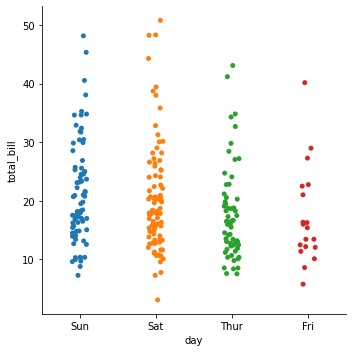

In [53]:
sns.catplot(x="day", y="total_bill", data=tips)

The `jitter` parameter controls the magnitude of jitter or disables it altogether:

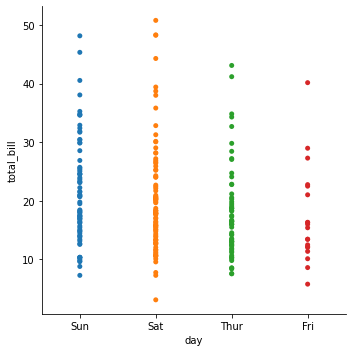

In [54]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a "beeswarn" and is drawn in seaborn by `swarmplot()`, which is activated by setting `kind="swarm"` in `catplot()`:

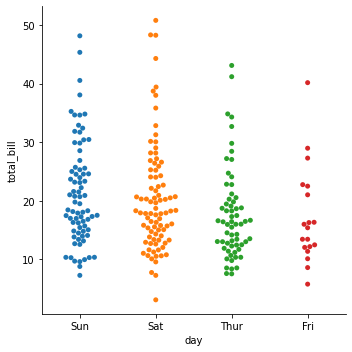

In [55]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

### Distribution Plots
Swarm plots are good for approximating distributions, but we often want to have an exact description of the data distribution. For this, we can use box plots and variants thereof.

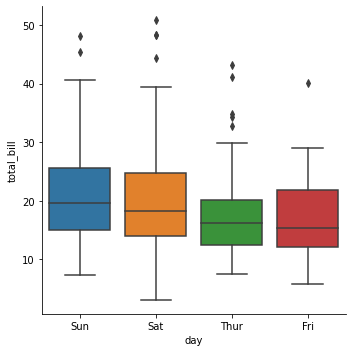

In [56]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Boxplots encode valuable information about our distribution. For each subset of the data, i.e. each box, the following pieces of information are shown:
- The central line of each box represents the median value.
- The top and bottom of the boxes are the $3^{rd}$ and $1^{st}$ quantile, respectively.
    - This means that 25% of all values are below the bottom line and 25% are above the top line, i.e. 50% of all values are within the colored region.
- The whiskers denote the outlier limits. Any value between the whiskers is considered "normal".
- The points outside of the whiskers are outliers that may require special attention.

The `hue` argument can be used to show additional, nested relationships.

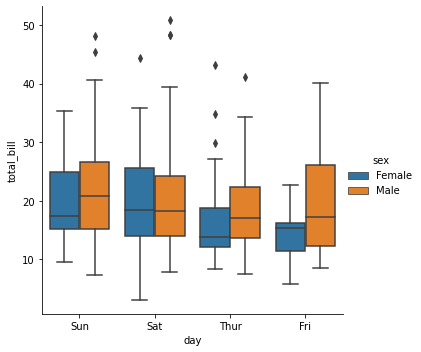

In [57]:
sns.catplot(x="day", y="total_bill", kind="box", hue="sex", data=tips)

Note that `hue` assumes a categorical variable when used on `catplot(...)` and `seaborn` will therefore automatically convert numerical variables into categorical ones.

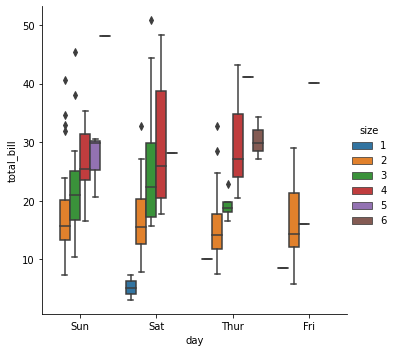

In [58]:
sns.catplot(x="day", y="total_bill", kind="box", hue="size", data=tips)

When quantiles aren't enough, `seaborn` can also display a violin plot. This kind of plot estimates a density and plots it as a distribution

Like with line plots, we may be interested in summary statistics over our data. For this, we can use a bar plot. `seaborn` will compute a summary statistic, such as the mean, as well as confidence intervals for each individual category (denoted by the x-axis).

In [59]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

If we're just interested in counting the number of occurances of a single variable, we can use `kind="count"`.

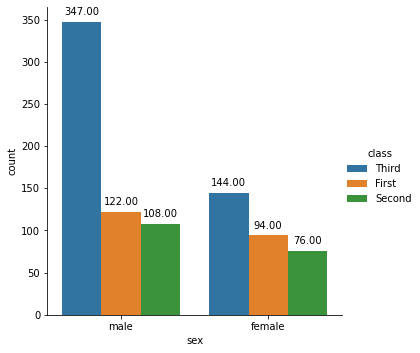

In [62]:
# Count the number of passengers by sex and class
g = sns.catplot(x="sex", hue="class", kind="count", data=titanic)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

An alternative to a barplot is a "point plot", which connects groups. This can be used to track psuedo-timeseries data that may only have a few categorical time points, e.g. sales data for 5 years. Notice how it connects data subgroups with the same value of the variable mapped to the `hue` aesthetic (`sex`).

### Showing multiple relationships with facets
Just like `relplot()`, the fact that `catplot()` is built on a `FacetGrid` means that it is easy to add faceting variables to visualize higher-dimensional relationships:

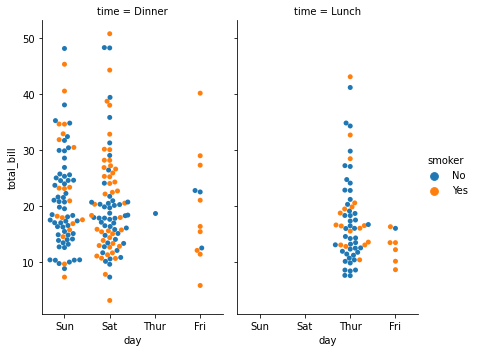

In [63]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="time",aspect=.6, kind="swarm", data=tips)

In [63]:
titanic_temp = titanic.copy()
titanic_temp = titanic_temp[titanic_temp["fare"] > 0]

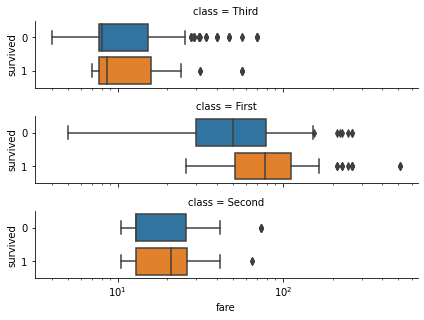

In [64]:
g = sns.catplot(x="fare", y="survived", row="class", kind="box",
               orient="h", height=1.5, aspect=4, data=titanic_temp)
g.set(xscale="log")

## Visualizing the distribution of a dataset
When dealing with a set of data, often the first thing you'll want to do is get a sense for how the variables are distributed.

### Plotting univariate distributions
The most convenient way to take a quick look at a univariate distribution in seaborn is the `distplot()` function. By default, this will draw a `histogram` and fit a `kernel density estimate (KDE)`.

In [64]:
diamonds = pd.read_csv('diamonds.csv')

<AxesSubplot:xlabel='price', ylabel='Density'>

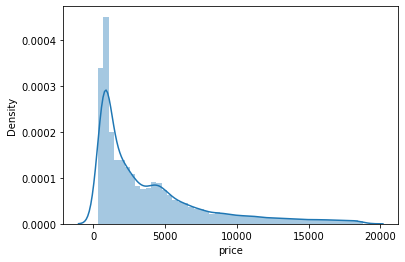

In [65]:
sns.distplot(diamonds.price)

Histogram are likely familar, and a `hist` function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let's remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the `rugplot()` function, but it is also available in `distplot()`:

### Plotting bivariate distributions
It can also be useful to visualize a bivariate distribtuion of two variables. The easiest way to do this in seaborn is to just use `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

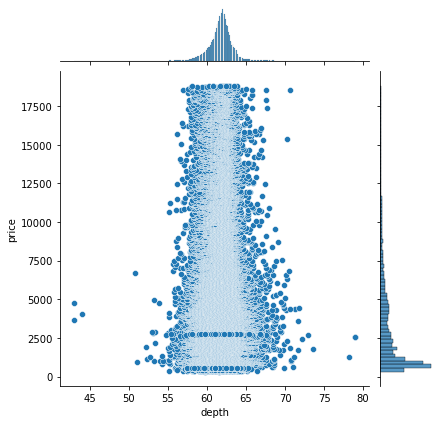

In [66]:
sns.jointplot(x=diamonds.depth, y=diamonds.price, data=df)

### Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the `pairplot()` function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal axes:

In [67]:
diamonds.head(10)

carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

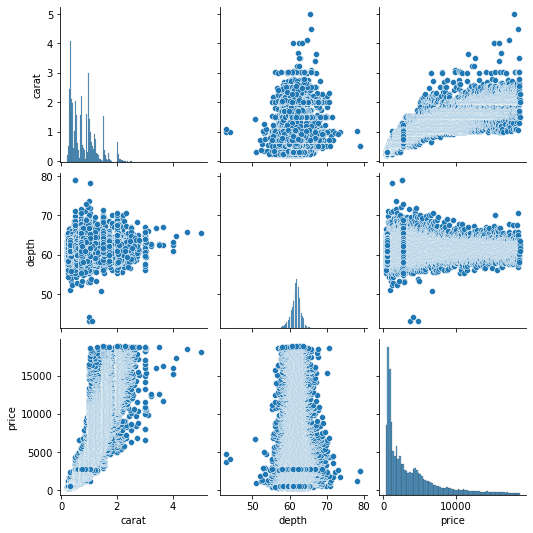

In [68]:
sns.pairplot(diamonds[["carat", "depth", "price"]])